In [3]:
df = pd.read_csv('Customer.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [48]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype ("float")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [50]:
df.isnull().sum().sum()

np.int64(0)

In [51]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [52]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df["customerID"].duplicated().sum()

np.int64(0)

In [55]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

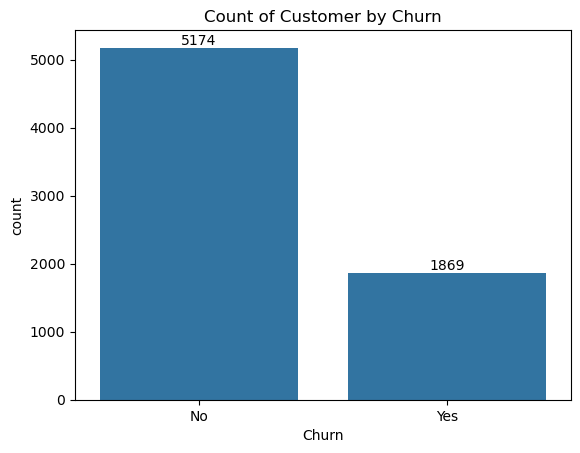

In [13]:
ax = sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

In [14]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


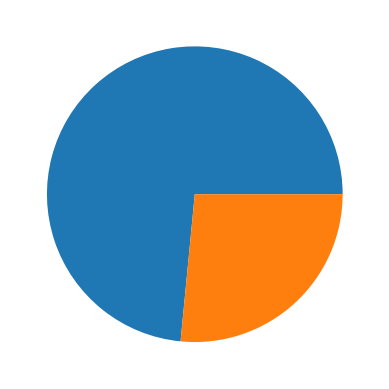

In [15]:
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'])
plt.show()

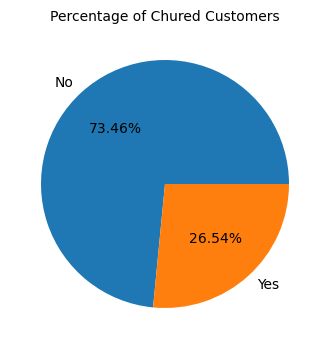

In [16]:
plt.figure(figsize = (4,6))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Chured Customers", fontsize = 10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customer s have churned out.
#now let's explore the reason behind it

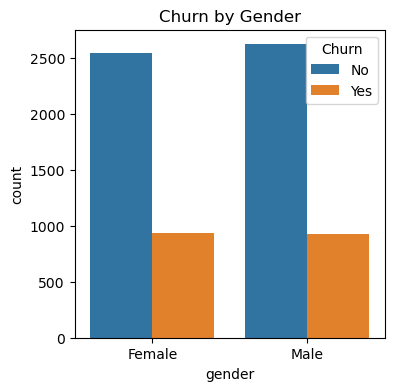

In [17]:
plt.figure(figsize = (4,4))
sns.countplot(x= "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

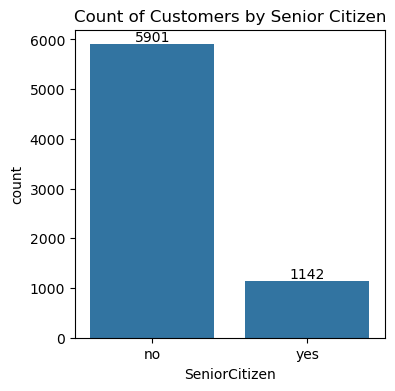

In [21]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen" , data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.show()

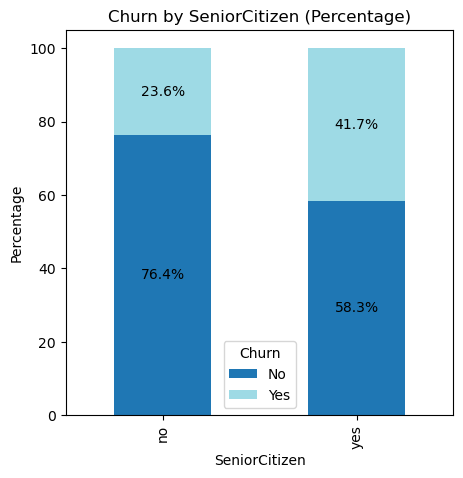

In [19]:
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index") * 100

# Plot stacked bar chart
ax = ct.plot(kind="bar", stacked=True, figsize=(5,5), colormap="tab20")

# Add percentage labels inside the bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.title("Churn by SeniorCitizen (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")
plt.legend(title="Churn")
plt.show()

#comparative a greater pecentage of people in senior citizen category have churned 

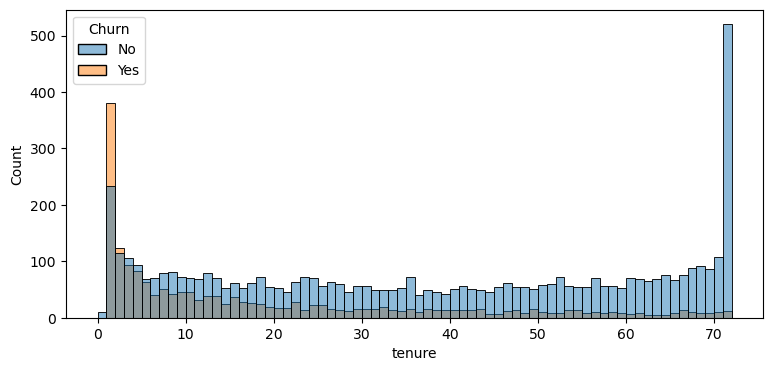

In [27]:
plt. figure(figsize = (9,4))
sns.histplot(x = "tenure" , data = df, bins = 72, hue = "Churn")
plt.show()

#people who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

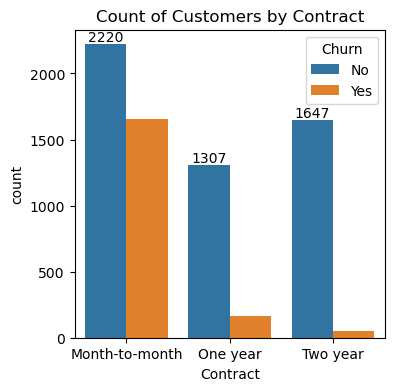

In [29]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract" , data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#people who have month to month contract are liketly to churn then from those who have 1 or 2 years or contract

In [30]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

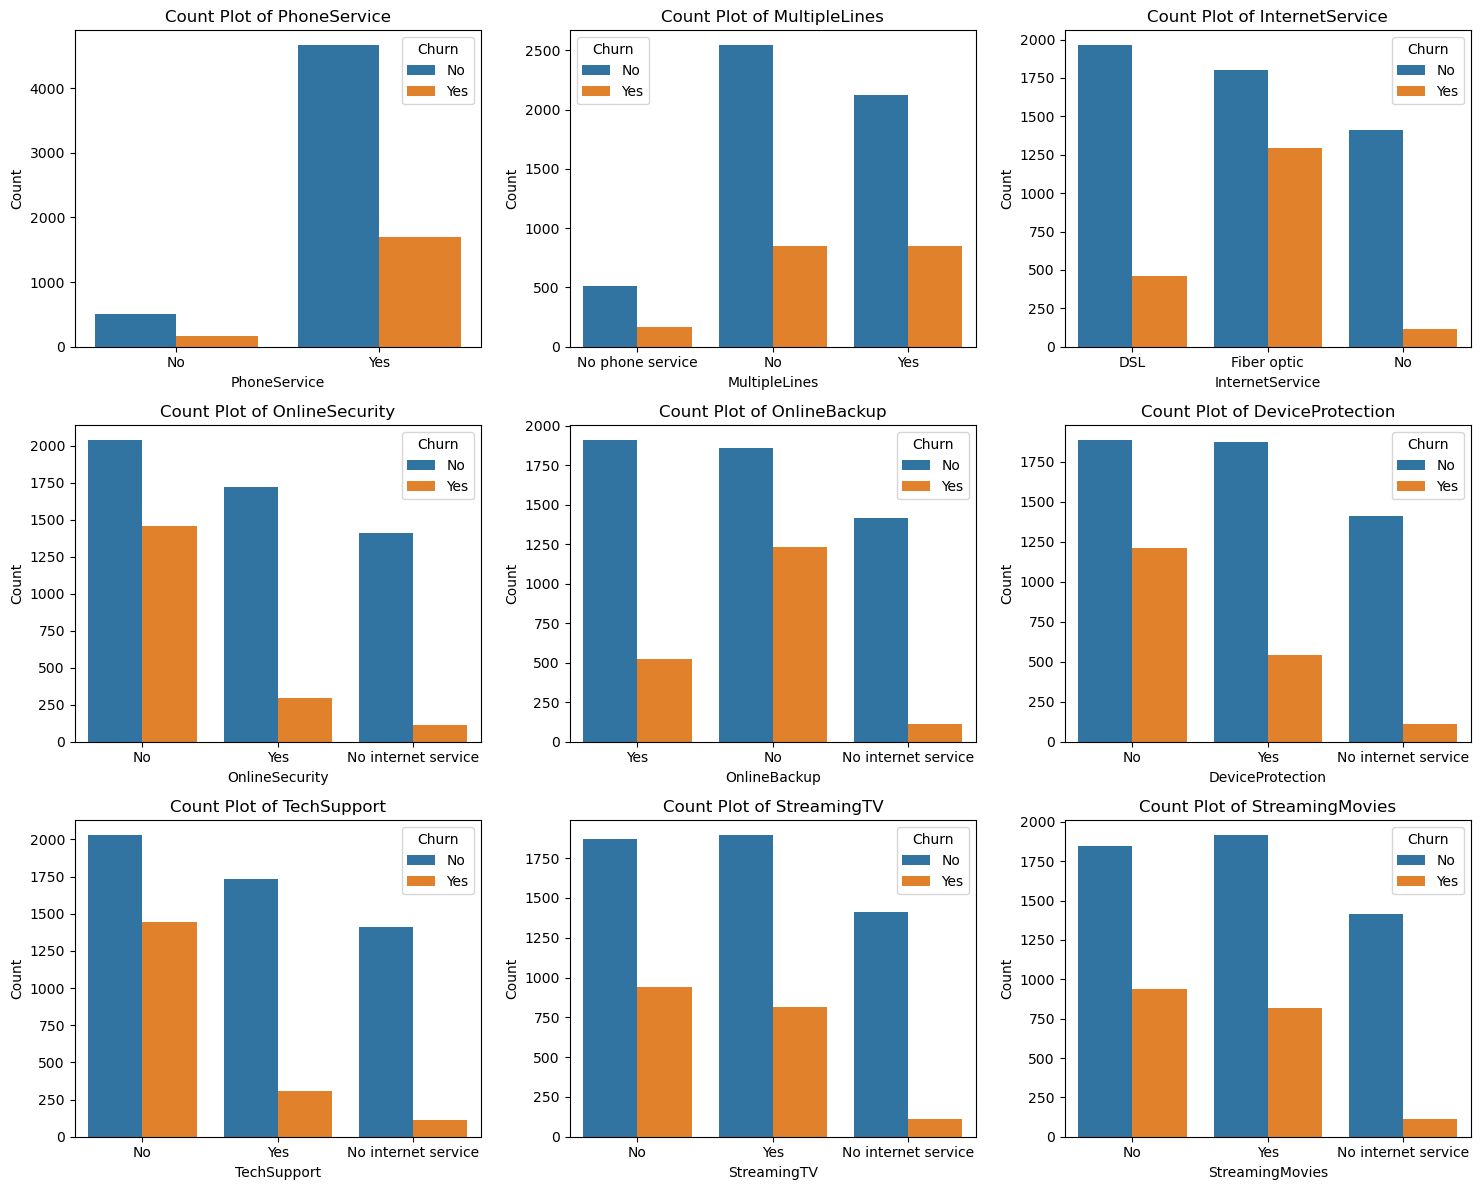

In [38]:
#List of columns for which to create count plots
columns = ["PhoneService", "MultipleLines", "InternetService",
        "OnlineSecurity", "OnlineBackup", "DeviceProtection",
        "TechSupport", "StreamingTV", "StreamingMovies"]

#number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols #Calculate number of rows needed 

# create subplots 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) # Adjust figsize as needed 

#Flatten the axes array for easy iteration (handling both 1D and 2D arrays)
axes = axes.flatten()  # make it 1D for easy iteration

# Iterate over columns and plot count plots 
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and Online Security enabled. For services like OnlineBackup, TechSupport, and Streaming TV, churn rates are noticeably higher when these services are not used or are unavailable

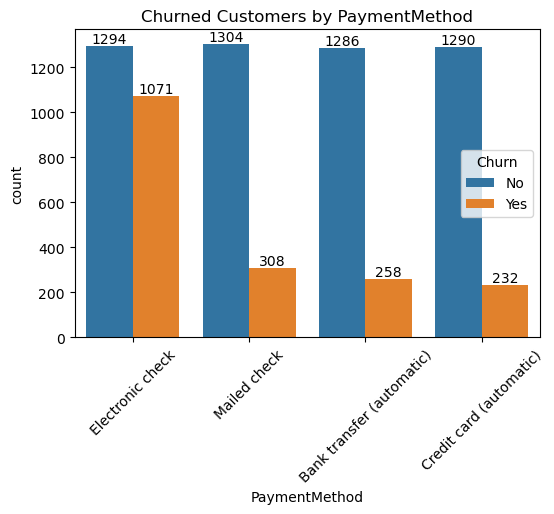

In [45]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod" , data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

# customer is likely to churn when he is using electronic check as a payment method.